In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df=pd.read_excel("data/godavari_adhala_adhala_mahasw_man_anantwadi.xlsx")

In [177]:
df.head()

,Data Type Code,Data Type Description,Data Time,Data Value,Unit
0,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-01T08:30:00,0.0,m
1,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-01T17:30:00,0.0,m
2,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-02T08:30:00,0.0,m
3,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-02T17:30:00,0.0,m
4,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-03T08:30:00,0.0,m


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data Type Code         3534 non-null   object 
 1   Data Type Description  3534 non-null   object 
 2   Data Time              3534 non-null   object 
 3   Data Value             3534 non-null   float64
 4   Unit                   3534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 138.2+ KB


In [179]:
df['Date Time'] = pd.to_datetime(df['Data Time'])
df = df.sort_values('Date Time')

df.rename(columns={'Date Time': 'datetime', 'Data Value': 'level'}, inplace=True)
df.head()

,Data Type Code,Data Type Description,Data Time,level,Unit,datetime
0,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-01T08:30:00,0.0,m,2018-01-01 08:30:00
1,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-01T17:30:00,0.0,m,2018-01-01 17:30:00
2,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-02T08:30:00,0.0,m,2018-01-02 08:30:00
3,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-02T17:30:00,0.0,m,2018-01-02 17:30:00
4,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-03T08:30:00,0.0,m,2018-01-03 08:30:00


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data Type Code         3534 non-null   object        
 1   Data Type Description  3534 non-null   object        
 2   Data Time              3534 non-null   object        
 3   level                  3534 non-null   float64       
 4   Unit                   3534 non-null   object        
 5   datetime               3534 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 165.8+ KB


In [181]:
df = df.set_index('datetime').asfreq('9H')  
df['level'] = df['level'].interpolate()

C:\Users\KUSH\AppData\Local\Temp\ipykernel_18736\4252648236.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index('datetime').asfreq('9H')


In [182]:
df.head()

,Data Type Code,Data Type Description,Data Time,level,Unit
datetime,,,,,
2018-01-01 08:30:00,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-01T08:30:00,0.0,m
2018-01-01 17:30:00,HZS,MANUAL-Water Level by Staff Gauge (0),2018-01-01T17:30:00,0.0,m
2018-01-02 02:30:00,NaN,NaN,NaN,0.0,NaN
2018-01-02 11:30:00,NaN,NaN,NaN,0.0,NaN
2018-01-02 20:30:00,NaN,NaN,NaN,0.0,NaN


In [ ]:
def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        seq = series[i:i+window_size]
        label = series[i+window_size]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(df['level'].values, window_size)

In [198]:
print(X[1])
print(y[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [184]:
split_ratio = 0.8  # 80% train, 20% test
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [185]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  # Fit on training labels only


MinMaxScaler()

In [187]:
X_train_scaled = scaler.transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)
y_train_scaled = scaler.transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))


In [199]:
print(X_train_scaled[0])
print(y_test_scaled[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0.04213424]


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(
        64,
        activation='tanh',
        return_sequences=False,
        input_shape=(window_size, 1)
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
189/189 [==============================] - 4s 10ms/step - loss: 0.0011 - val_loss: 9.9739e-04
Epoch 2/50
189/189 [==============================] - 1s 7ms/step - loss: 4.2830e-04 - val_loss: 6.9346e-04
Epoch 3/50
189/189 [==============================] - 1s 6ms/step - loss: 3.2984e-04 - val_loss: 5.4219e-04
Epoch 4/50
189/189 [==============================] - 1s 6ms/step - loss: 2.4421e-04 - val_loss: 5.0240e-04
Epoch 5/50
189/189 [==============================] - 1s 7ms/step - loss: 1.7712e-04 - val_loss: 4.2523e-04
Epoch 6/50
189/189 [==============================] - 1s 6ms/step - loss: 1.6013e-04 - val_loss: 4.2366e-04
Epoch 7/50
189/189 [==============================] - 1s 6ms/step - loss: 1.5361e-04 - val_loss: 4.1704e-04
Epoch 8/50
189/189 [==============================] - 1s 8ms/step - loss: 1.3922e-04 - val_loss: 3.8361e-04
Epoch 9/50
189/189 [==============================] - 1s 7ms/step - loss: 1.5478e-04 - val_loss: 3.7899e-04
Epoch 10/50
189/189 [==========

In [191]:
y_pred = model.predict(X_test_scaled)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))


48/48 [==============================] - 1s 3ms/step


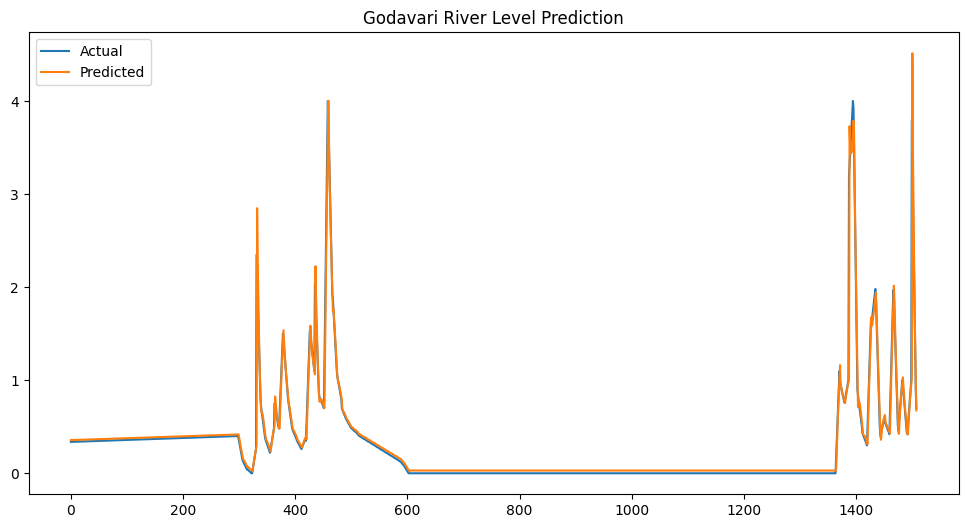

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('Godavari River Level Prediction')
plt.show()

In [ ]:
# Already predicted
y_pred = model.predict(X_test_scaled)

# Inverse scale to get back to meters
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.3f} m")
print(f"MAE: {mae:.3f} m")
print(f"R² Score: {r2:.3f}")


48/48 [==============================] - 0s 3ms/step
RMSE: 0.126 m
MAE: 0.041 m
R² Score: 0.950


In [194]:
last_sequence = X_test_scaled[-1]

last_sequence = last_sequence.reshape((1, window_size, 1))

next_pred_scaled = model.predict(last_sequence)
next_pred = scaler.inverse_transform(next_pred_scaled)

print(f"Predicted next water level: {next_pred[0][0]:.2f} m")

1/1 [==============================] - 0s 27ms/step
Predicted next water level: 0.68 m


In [205]:
y_pred_baseline = y_test_inv[:-1]
print("Baseline RMSE:", np.sqrt(np.mean((y_test_inv[1:] - y_pred_baseline)**2)))


Baseline RMSE: 0.13003257028457021


In [209]:
horizon = 3  # predict 3 steps ahead
last_sequence = X_test_scaled[-1].reshape(1, window_size, 1)
predictions = []

for _ in range(horizon):
    next_step_scaled = model.predict(last_sequence)
    print(next_step_scaled)
    predictions.append(next_step_scaled[0,0])
    # reshape to 3D and append
    next_step_scaled_3d = next_step_scaled.reshape((1,1,1))
    last_sequence = np.append(last_sequence[:,1:,:], next_step_scaled_3d, axis=1)

# inverse scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
print("Next", horizon, "predicted water levels (meters):", predictions.flatten())


1/1 [==============================] - 0s 43ms/step
[[0.08446056]]
1/1 [==============================] - 0s 28ms/step
[[0.0672317]]
1/1 [==============================] - 0s 31ms/step
[[0.05904618]]
Next 3 predicted water levels (meters): [0.67568445 0.5378536  0.4723694 ]
